<a href="https://colab.research.google.com/github/panditadata/Another-WorldBank-With-A-Little-Bit-Of-Spice/blob/main/World_Bank_Education_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

#World Bank Education Data Analysis

##Intro to Python


In [46]:
print("World Bank")
print(5)
print(5.5)
print(True)


World Bank
5
5.5
True


##Loading the Data


Data taken from [World Bank Repository](https://https://data.worldbank.org/topic/education?cid=EXT_TWBN_D_EXT)
<p>Download data <p>
<p>Upload data<p>
Read data into pandas

In [47]:
import pandas as pd

main_data = pd.read_csv("/content/API_4_DS2_en_csv_v2_1741864.csv", skiprows= 4)
main_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,56.075544,56.703126,57.414449,58.086708,58.679715,59.55249,60.248997,60.890062,61.639241,62.566563,63.078929,63.850512,64.825383,65.810270,66.635051,67.185101,67.578450,67.804376,67.945127,68.154412,67.755890,67.567480,67.614074,67.749705,67.796747,68.523104,69.021763,69.298246,69.471969,69.667845,69.450721,69.326281,69.279421,69.261277,69.240421,69.323344,69.421636,69.554820,69.734750,69.935320,69.857389,69.690384,69.445924,69.159726,68.838092,68.885601,68.986934,69.108851,69.181105,69.159774,69.137615,68.946339,68.646606,68.321199,NaN,NaN
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,40.689595,39.900095,39.011064,38.134727,37.316086,36.08681,35.015040,33.989011,32.869085,31.577559,30.878421,29.907564,28.734007,27.542514,26.514244,25.829247,25.314207,25.001206,24.785155,24.527973,24.862716,24.976954,24.853059,24.641172,24.547459,24.084677,23.804499,23.685590,23.598435,23.420148,23.562500,23.583106,23.490725,23.348127,23.179202,22.918685,22.622958,22.277539,21.882374,21.473343,21.223992,21.080398,21.005742,20.949189,20.873619,20.530937,20.092629,19.593055,19.111724,18.703098,18.257495,17.980183,17.802447,17.620445,NaN,NaN
2,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
import pandas as pd

country_data=pd.read_csv("/content/Metadata_Country_API_4_DS2_en_csv_v2_1741864.csv")
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


##Cleaning the Data

Sort and merge 2 datasets
<p>Creating dataset<p>

In [49]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [50]:
main_data['Indicator Name'].unique()

array(['Population ages 15-64 (% of total population)',
       'Population ages 0-14 (% of total population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Number of deaths ages 20-24 years',
       'Number of deaths ages 15-19 years',
       'Number of deaths ages 10-14 years',
       'Number of deaths ages 5-9 years',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure o

== is a comparison operator and check each column that has the required indicator 

In [51]:
main_data_unem=main_data[main_data['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_unem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Afghanistan,AFG,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,NaN
328,Angola,AGO,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,NaN
490,Albania,ALB,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,NaN
652,Andorra,AND,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
main_data_unem= main_data_unem[['Country Name', 'Country Code','1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
main_data_unem.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062
328,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631
490,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190
652,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
country_data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [54]:
country_data.columns
country_data=country_data[['Country Code', 'Region', 'IncomeGroup']]
country_data.head()


,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [55]:
merged_data = pd.merge(main_data_unem, country_data, on='Country Code')
merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,South Asia,Low income
2,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


In [56]:
merged_data.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Region',
       'IncomeGroup'],
      dtype='object')

In [57]:
merged_data=merged_data[['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Region',
       'IncomeGroup']]
merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,South Asia,Low income
2,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


#Exploratory Data Analysis
###Removing all the NAN


In [58]:

merged_data.isna()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
259,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
260,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
261,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
merged_data.isna().sum()


Country Name     0
Country Code     0
1991            30
1992            30
1993            30
1994            30
1995            30
1996            30
1997            30
1998            30
1999            30
2000            30
2001            30
2002            30
2003            30
2004            30
2005            30
2006            30
2007            30
2008            30
2009            30
2010            30
2011            30
2012            30
2013            30
2014            30
2015            30
2016            30
2017            30
2018            30
2019            30
2020            30
Region          46
IncomeGroup     46
dtype: int64

In [60]:
merged_data.isna().shape

(263, 34)

In [61]:
merged_data_clean = merged_data.dropna()
merged_data_clean

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
1,Afghanistan,AFG,14.226000,14.348000,14.391000,14.515000,14.803000,14.505000,14.699000,14.710,14.794000,14.733000,14.702000,15.036000,14.859,14.877000,14.910000,14.431000,14.724000,14.154000,14.911000,14.815000,14.781000,14.820,14.680000,14.505,14.427000,14.314000,14.090000,13.906000,14.004000,14.062000,South Asia,Low income
2,Angola,AGO,2.637000,2.723000,2.695000,2.882000,2.948000,2.994000,2.876000,2.967,2.932000,2.798000,2.811000,2.899000,2.833,2.882000,2.852000,2.746000,2.723000,2.710000,2.845000,10.922000,7.718000,7.788,7.772000,7.719,7.681000,7.563000,7.467000,7.327000,6.942000,6.631000,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804000,16.247999,16.711000,16.749001,16.766001,16.739000,16.434999,16.829,16.916000,16.898001,16.992001,17.063000,17.104,17.011999,16.919001,16.643999,16.399000,13.752000,15.734000,15.881000,13.762000,11.467,13.345000,15.153,17.098000,14.573000,12.563000,11.229000,11.604000,12.190000,Europe & Central Asia,Upper middle income
6,United Arab Emirates,ARE,2.431000,2.115000,2.259000,2.259000,2.359000,2.441000,2.501000,2.513,2.529000,2.718000,3.355000,3.978000,5.107,6.390000,7.221000,6.682000,5.829000,5.419000,5.843000,5.883000,5.983000,5.956,5.851000,5.214,4.703000,4.200000,7.136000,6.187000,6.046000,6.042000,Middle East & North Africa,High income
7,Argentina,ARG,5.747000,6.711000,12.558000,13.927000,22.195999,19.190001,17.631001,14.029,15.147000,16.344999,17.191999,18.830000,17.549,15.789000,13.561000,12.392000,10.544000,9.720000,9.855000,9.196000,8.496000,8.811,8.484000,8.383,8.851000,9.118000,9.464000,10.538000,10.922000,11.487000,Latin America & Caribbean,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Samoa,WSM,2.667000,3.014000,3.278000,3.656000,3.952000,4.296000,4.505000,4.889,5.232000,5.700000,6.095000,6.167000,6.235,6.207000,6.279000,6.088000,6.026000,6.120000,6.236000,6.508000,6.691000,10.345,10.355000,10.350,10.265000,10.293000,9.970000,9.806000,9.837000,9.797000,East Asia & Pacific,Upper middle income
259,"Yemen, Rep.",YEM,3.728000,3.832000,3.833000,3.877000,4.561000,5.341000,6.207000,7.146,8.157000,8.936000,9.696000,10.629000,11.572,12.460000,13.378000,14.102000,15.009000,16.077999,17.962999,19.591999,20.389999,22.830,24.614000,26.115,25.295000,25.466999,25.469000,25.306999,24.879999,24.462000,Middle East & North Africa,Low income
260,South Africa,ZAF,35.853001,35.848000,36.375999,36.492001,36.417000,36.494999,36.243000,36.069,36.351002,36.330002,36.787998,41.546001,39.480,36.366001,36.550999,35.971001,33.179001,25.836000,25.590000,27.032000,27.247000,27.087,26.547001,27.045,27.542999,29.006001,29.297001,29.059999,30.334999,30.809999,Sub-Saharan Africa,Upper middle income
261,Zambia,ZMB,22.099001,21.347000,20.601000,18.608000,17.459999,15.826000,13.489000,11.494,11.612000,11.432000,12.078000,12.867000,13.739,14.416000,15.054000,12.345000,9.842000,7.705000,10.413000,13.275000,10.429000,8.007,8.864000,9.731,10.687000,11.629000,12.570000,12.448000,12.237000,11.981000,Sub-Saharan Africa,Lower middle income


In [62]:
merged_data_clean.shape

(187, 34)

In [63]:

grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income 

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
IncomeGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High income,7.736467,8.250783,9.243850,9.437617,9.237233,9.212950,8.843950,8.693183,8.703783,8.479150,8.252700,8.419200,8.672367,8.563100,8.345683,7.703300,7.011633,6.799433,8.279067,8.769983,8.888267,9.132533,9.244683,8.827083,8.370100,7.900950,7.301283,6.753733,6.569350,6.594800
Low income,5.191034,5.122586,5.241103,5.521621,5.722138,5.862035,5.939793,6.142310,6.236034,6.476931,6.796276,6.910207,6.998379,7.046828,7.092172,7.077345,7.154931,7.056069,7.421069,7.645621,7.609897,7.646276,7.719931,7.709862,7.734690,7.701448,7.599138,7.491828,7.458897,7.440862
Lower middle income,7.770750,7.832417,8.115313,8.255917,8.423167,8.522042,8.436583,8.552500,8.596146,8.522167,8.632187,8.800479,8.815729,8.629063,8.552938,8.074896,7.795771,7.745271,8.212021,8.366792,8.326208,8.061479,8.041271,7.941438,8.267479,8.405146,8.481042,8.283375,8.333917,8.284333
Upper middle income,11.855680,11.943880,12.369380,12.909100,13.475140,13.965980,14.108920,14.097900,14.203700,13.907960,13.776640,14.130820,13.996420,13.734020,13.419940,12.613340,11.910920,11.348980,12.007120,12.239020,12.157240,12.124720,12.233620,12.294740,12.246720,12.158600,11.795040,11.403020,11.610500,11.690940


In [64]:
grouped_data_income_describe = merged_data_clean.groupby(['IncomeGroup']).describe()
grouped_data_income_describe

1991                        ...     2020                     
                    count       mean        std  ...      50%       75%        max
IncomeGroup                                      ...                              
High income          60.0   7.736467   5.462825  ...   5.3650   8.22600  22.454000
Low income           29.0   5.191034   5.147265  ...   3.5800  11.13500  27.171000
Lower middle income  48.0   7.770750   8.743691  ...   5.7435  10.03575  40.616001
Upper middle income  50.0  11.855680  10.078790  ...  10.2210  15.78975  30.809999

[4 rows x 240 columns]

In [65]:
transpose_income_group = grouped_data_income.transpose()
transpose_income_group

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
1991,7.736467,5.191034,7.770750,11.85568
1992,8.250783,5.122586,7.832417,11.94388
1993,9.243850,5.241103,8.115313,12.36938
1994,9.437617,5.521621,8.255917,12.90910
1995,9.237233,5.722138,8.423167,13.47514
1996,9.212950,5.862035,8.522042,13.96598
1997,8.843950,5.939793,8.436583,14.10892
1998,8.693183,6.142310,8.552500,14.09790
1999,8.703783,6.236034,8.596146,14.20370
2000,8.479150,6.476931,8.522167,13.90796


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, '% UnEmployment')

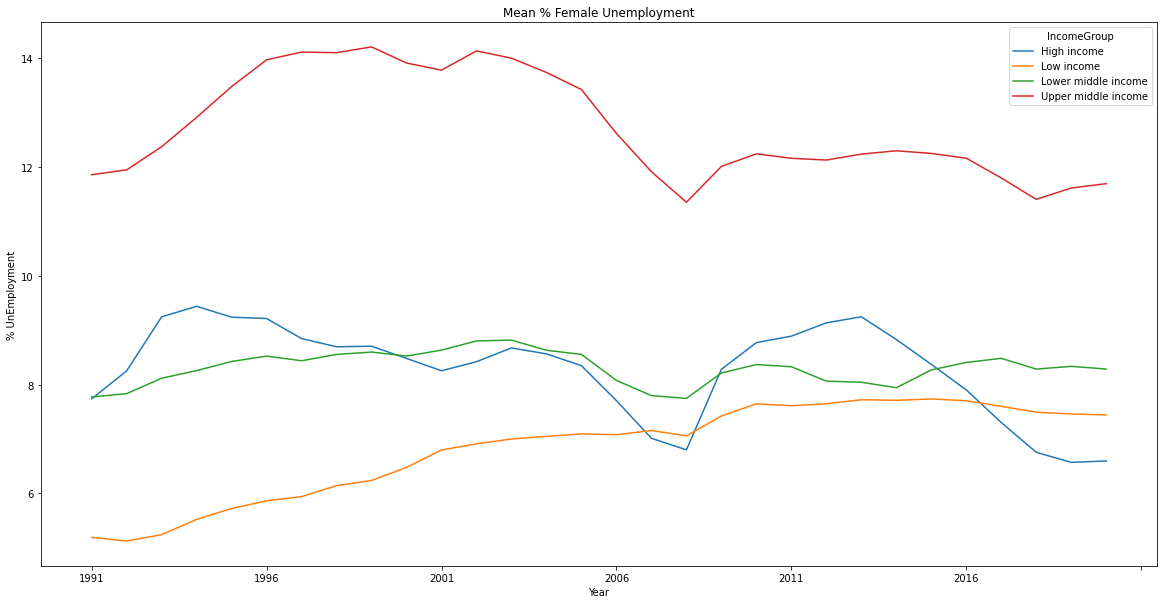

In [67]:
transpose_income_group.plot(figsize=(20,10))
plt.title("Mean % Female Unemployment")
plt.xlabel("Year")
plt.ylabel("% UnEmployment")

Text(0, 0.5, '% UnEmployment')

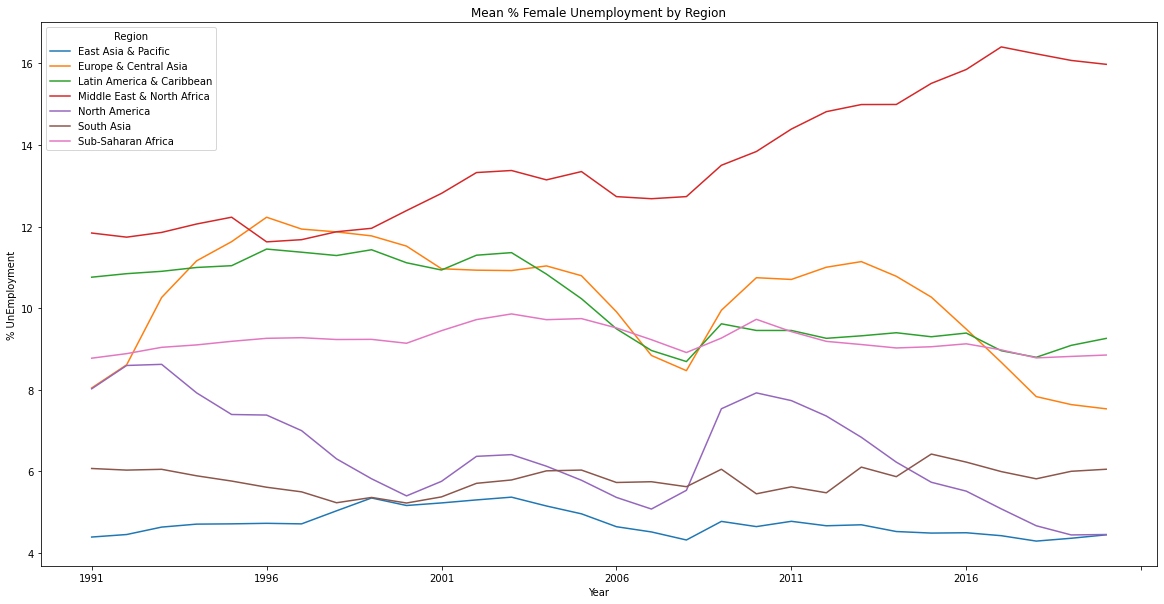

In [68]:
grouped_data_region = merged_data_clean.groupby(['Region']).describe()
grouped_data_region = merged_data_clean.groupby(['Region']).mean()
transposed_region = grouped_data_region.transpose()
transposed_region.plot(figsize=(20,10))
plt.title('Mean % Female Unemployment by Region')
plt.xlabel('Year')
plt.ylabel("% UnEmployment")

##ANOVA

In [69]:
import scipy.stats as stats

In [70]:
merged_data_clean.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
1,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505000,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,South Asia,Low income
2,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994000,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739000,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,Europe & Central Asia,Upper middle income
6,United Arab Emirates,ARE,2.431,2.115000,2.259,2.259000,2.359000,2.441000,2.501000,2.513,2.529,2.718000,3.355000,3.978,5.107,6.390000,7.221000,6.682000,5.829,5.419,5.843,5.883,5.983,5.956,5.851,5.214,4.703,4.200,7.136,6.187,6.046,6.042,Middle East & North Africa,High income
7,Argentina,ARG,5.747,6.711000,12.558,13.927000,22.195999,19.190001,17.631001,14.029,15.147,16.344999,17.191999,18.830,17.549,15.789000,13.561000,12.392000,10.544,9.720,9.855,9.196,8.496,8.811,8.484,8.383,8.851,9.118,9.464,10.538,10.922,11.487,Latin America & Caribbean,Upper middle income


##Income Groups and the length

In [71]:
income_groups = merged_data_clean['IncomeGroup'].unique()
print(income_groups)
len(income_groups)

['Low income' 'Lower middle income' 'Upper middle income' 'High income']


4

###Verification of Number of countries

In [72]:
from IPython.display import display
with pd.option_context('display.max_rows', 299, 'display.max_columns', 40):
    display(merged_data_clean) #need display to show all data
 

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
1,Afghanistan,AFG,14.226000,14.348000,14.391000,14.515000,14.803000,14.505000,14.699000,14.710000,14.794000,14.733000,14.702000,15.036000,14.859000,14.877000,14.910000,14.431000,14.724000,14.154000,14.911000,14.815000,14.781000,14.820000,14.680000,14.505000,14.427000,14.314000,14.090000,13.906000,14.004000,14.062000,South Asia,Low income
2,Angola,AGO,2.637000,2.723000,2.695000,2.882000,2.948000,2.994000,2.876000,2.967000,2.932000,2.798000,2.811000,2.899000,2.833000,2.882000,2.852000,2.746000,2.723000,2.710000,2.845000,10.922000,7.718000,7.788000,7.772000,7.719000,7.681000,7.563000,7.467000,7.327000,6.942000,6.631000,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804000,16.247999,16.711000,16.749001,16.766001,16.739000,16.434999,16.829000,16.916000,16.898001,16.992001,17.063000,17.104000,17.011999,16.919001,16.643999,16.399000,13.752000,15.734000,15.881000,13.762000,11.467000,13.345000,15.153000,17.098000,14.573000,12.563000,11.229000,11.604000,12.190000,Europe & Central Asia,Upper middle income
6,United Arab Emirates,ARE,2.431000,2.115000,2.259000,2.259000,2.359000,2.441000,2.501000,2.513000,2.529000,2.718000,3.355000,3.978000,5.107000,6.390000,7.221000,6.682000,5.829000,5.419000,5.843000,5.883000,5.983000,5.956000,5.851000,5.214000,4.703000,4.200000,7.136000,6.187000,6.046000,6.042000,Middle East & North Africa,High income
7,Argentina,ARG,5.747000,6.711000,12.558000,13.927000,22.195999,19.190001,17.631001,14.029000,15.147000,16.344999,17.191999,18.830000,17.549000,15.789000,13.561000,12.392000,10.544000,9.720000,9.855000,9.196000,8.496000,8.811000,8.484000,8.383000,8.851000,9.118000,9.464000,10.538000,10.922000,11.487000,Latin America & Caribbean,Upper middle income
8,Armenia,ARM,2.188000,2.422000,7.499000,8.613000,10.265000,14.891000,17.125999,13.642000,15.212000,14.492000,13.817000,13.307000,12.666000,11.875000,11.258000,10.467000,9.767000,13.946000,19.681999,21.285000,19.652000,18.181999,18.139000,19.465000,19.252001,17.483999,17.471001,17.198999,17.295000,17.451000,Europe & Central Asia,Upper middle income
11,Australia,AUS,9.148000,9.925000,9.995000,9.360000,8.104000,8.235000,8.070000,7.326000,6.657000,6.060000,6.443000,6.161000,5.979000,5.536000,5.221000,4.923000,4.787000,4.573000,5.400000,5.377000,5.305000,5.326000,5.609000,6.172000,6.073000,5.779000,5.668000,5.318000,5.328000,5.415000,East Asia & Pacific,High income
12,Austria,AUT,3.544000,3.771000,4.500000,3.966000,4.899000,5.205000,5.272000,5.594000,4.756000,4.594000,4.128000,4.526000,4.337000,5.893000,5.858000,5.603000,5.301000,4.411000,5.085000,4.629000,4.584000,4.786000,5.294000,5.382000,5.308000,5.543000,5.031000,4.650000,4.547000,4.706000,Europe & Central Asia,High income
13,Azerbaijan,AZE,0.996000,1.949000,4.863000,6.671000,7.772000,8.855000,10.035000,10.942000,11.950000,12.765000,11.540000,10.370000,9.239000,8.053000,7.353000,6.333000,5.256000,4.931000,6.586000,6.925000,6.451000,6.094000,5.945000,5.839000,5.867000,5.908000,5.927000,5.766000,6.335000,6.762000,Europe & Central Asia,Upper middle income
14,Burundi,BDI,1.278000,1.315000,1.400000,1.405000,1.397000,1.435000,1.410000,1.387000,1.404000,1.386000,1.381000,1.418000,1.419000,1.386000,1.337000,1.246000,1.166000,1.145000,1.280000,1.294000,1.259000,1.237000,1.217000,1.155000,1.126000,1.123000,1.073000,1.033000,1.009000,0.986000,Sub-Saharan Africa,Low income


In [73]:
#how many partipant countries
CC_countries = merged_data_clean['Country Code'].unique()
print(CC_countries)
print(len(CC_countries)) 

['AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN'
 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BRB' 'BRN'
 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DJI' 'DNK' 'DOM' 'DZA'
 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'GAB' 'GBR' 'GEO'
 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA'
 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL'
 'PNG' 'POL' 'PRI' 'PRK' 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA'
 'SAU' 'SDN' 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SOM' 'SRB' 'SSD' 'STP' 'SUR'
 'SVK' 'SVN' 'SWE' 'SWZ' 'SYR' 'TCD' 'TGO' 'THA' 'T

In [74]:

CC_IG = merged_data_clean[['Country Code','IncomeGroup']]
print(CC_IG)
print(len(CC_IG))


    Country Code          IncomeGroup
1            AFG           Low income
2            AGO  Lower middle income
3            ALB  Upper middle income
6            ARE          High income
7            ARG  Upper middle income
..           ...                  ...
257          WSM  Upper middle income
259          YEM           Low income
260          ZAF  Upper middle income
261          ZMB  Lower middle income
262          ZWE  Lower middle income

[187 rows x 2 columns]
187


In [75]:
CC_IG_GP= CC_IG.groupby(['Country Code']).describe()
print(CC_IG_GP)
print(len(CC_IG_GP))


             IncomeGroup                                 
                   count unique                  top freq
Country Code                                             
AFG                    1      1           Low income    1
AGO                    1      1  Lower middle income    1
ALB                    1      1  Upper middle income    1
ARE                    1      1          High income    1
ARG                    1      1  Upper middle income    1
...                  ...    ...                  ...  ...
WSM                    1      1  Upper middle income    1
YEM                    1      1           Low income    1
ZAF                    1      1  Upper middle income    1
ZMB                    1      1  Lower middle income    1
ZWE                    1      1  Lower middle income    1

[187 rows x 4 columns]
187


In [76]:
IG_IG_GP= CC_IG.groupby(['IncomeGroup']).describe()
print(IG_IG_GP)
print(len(IG_IG_GP))


                    Country Code                 
                           count unique  top freq
IncomeGroup                                      
High income                   60     60  TTO    1
Low income                    29     29  GNB    1
Lower middle income           48     48  BTN    1
Upper middle income           50     50  BLZ    1
4


In [77]:
CC_IG_2019 = merged_data_clean[['Country Code','2019','IncomeGroup']]
print(CC_IG_2019)
print(len(CC_IG_2019))

    Country Code       2019          IncomeGroup
1            AFG  14.004000           Low income
2            AGO   6.942000  Lower middle income
3            ALB  11.604000  Upper middle income
6            ARE   6.046000          High income
7            ARG  10.922000  Upper middle income
..           ...        ...                  ...
257          WSM   9.837000  Upper middle income
259          YEM  24.879999           Low income
260          ZAF  30.334999  Upper middle income
261          ZMB  12.237000  Lower middle income
262          ZWE   5.458000  Lower middle income

[187 rows x 3 columns]
187


In [78]:
import statistics
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income
#grouped_data_income_2019= grouped_data_income(['2019'])
#Data2019=merged_data_clean['2019']
#mode = statistics.mode(transpose_income_group.groupby([]))
#print(mode)

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
IncomeGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High income,7.736467,8.250783,9.243850,9.437617,9.237233,9.212950,8.843950,8.693183,8.703783,8.479150,8.252700,8.419200,8.672367,8.563100,8.345683,7.703300,7.011633,6.799433,8.279067,8.769983,8.888267,9.132533,9.244683,8.827083,8.370100,7.900950,7.301283,6.753733,6.569350,6.594800
Low income,5.191034,5.122586,5.241103,5.521621,5.722138,5.862035,5.939793,6.142310,6.236034,6.476931,6.796276,6.910207,6.998379,7.046828,7.092172,7.077345,7.154931,7.056069,7.421069,7.645621,7.609897,7.646276,7.719931,7.709862,7.734690,7.701448,7.599138,7.491828,7.458897,7.440862
Lower middle income,7.770750,7.832417,8.115313,8.255917,8.423167,8.522042,8.436583,8.552500,8.596146,8.522167,8.632187,8.800479,8.815729,8.629063,8.552938,8.074896,7.795771,7.745271,8.212021,8.366792,8.326208,8.061479,8.041271,7.941438,8.267479,8.405146,8.481042,8.283375,8.333917,8.284333
Upper middle income,11.855680,11.943880,12.369380,12.909100,13.475140,13.965980,14.108920,14.097900,14.203700,13.907960,13.776640,14.130820,13.996420,13.734020,13.419940,12.613340,11.910920,11.348980,12.007120,12.239020,12.157240,12.124720,12.233620,12.294740,12.246720,12.158600,11.795040,11.403020,11.610500,11.690940


In [79]:
income_groups
print(income_groups)
income_groups[0]
for income_group in income_groups:
  print(income_group)
   

['Low income' 'Lower middle income' 'Upper middle income' 'High income']
Low income
Lower middle income
Upper middle income
High income


In [80]:
income_group_data=[]
for i in range (len(income_groups)):
  income_group_data.append(merged_data_clean['2019'][merged_data_clean['IncomeGroup']==income_groups[i]])

In [81]:
income_group_data

[1      14.004000
 14      1.009000
 17      9.223000
 32      3.565000
 41      3.404000
 67      4.953000
 70      2.756000
 83      3.316000
 84     12.237000
 85      2.210000
 98     16.693001
 128     2.224000
 148     1.846000
 155     7.954000
 162     3.453000
 165     6.617000
 170     0.360000
 190     2.331000
 200     1.070000
 203    27.768999
 207     3.628000
 210    11.079000
 213    13.406000
 224    20.837000
 226     1.706000
 229     1.547000
 231     9.935000
 244     2.296000
 259    24.879999
 Name: 2019, dtype: float64, 2       6.942000
 16      2.336000
 18      6.204000
 26      3.809000
 30      3.200000
 39      3.772000
 40      3.872000
 42     10.105000
 44      4.702000
 45     11.491000
 54     10.402000
 58     21.080000
 65     22.150000
 81      4.464000
 95      7.003000
 107     5.233000
 118     2.800000
 119     7.467000
 120     0.824000
 126     0.569000
 135     6.687000
 138    27.118000
 145    10.415000
 147     4.155000
 157     2.074000


In [82]:
statistic, pvalue = stats.f_oneway(income_group_data[0],
                                   income_group_data[1],
                                   income_group_data[2],
                                   income_group_data[3])
print("statistic: %s pvalue %s" %(statistic,pvalue))

statistic: 5.052886221006664 pvalue 0.0021894356280740147


In [83]:
regions = merged_data_clean['Region'].unique()
print(regions)


regions_data=[]
for i in range (len(regions)):
  regions_data.append(merged_data_clean['2019'][merged_data_clean['Region']==regions[i]])



statistic, pvalue = stats.f_oneway(regions_data[0],
                                   regions_data[1],
                                   regions_data[2],
                                   regions_data[3],regions_data[4],
                                   regions_data[5],regions_data[6])
print("statistic: %s pvalue %s" %(statistic,pvalue))


['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
statistic: 7.031185985789595 pvalue 9.75436578876421e-07


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


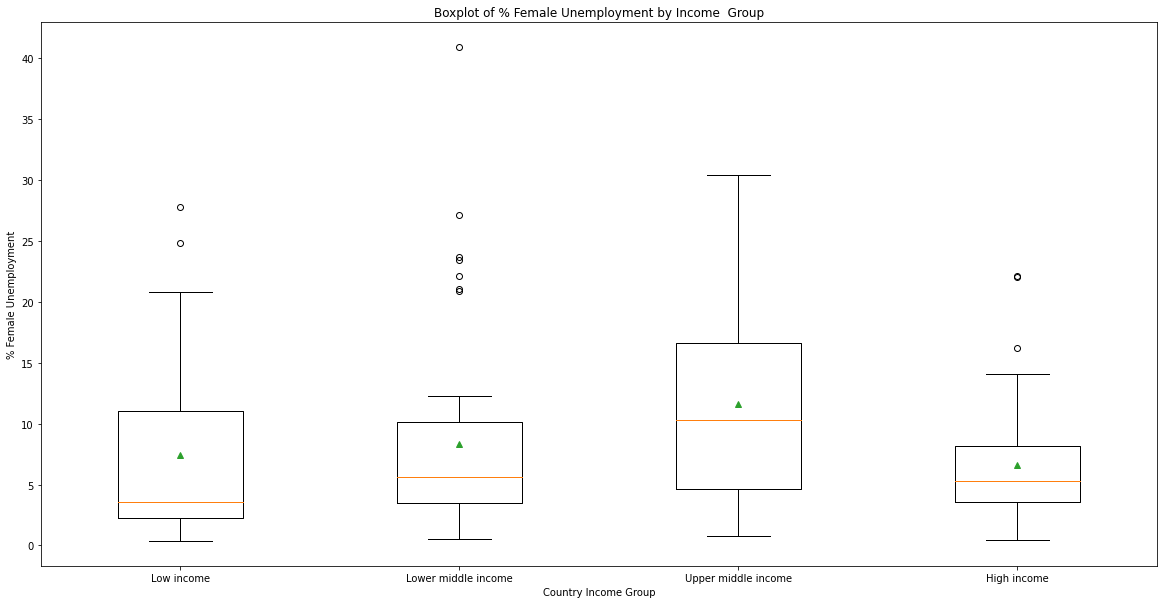

In [84]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_title("Boxplot of % Female Unemployment by Income  Group")
ax.set
ax.boxplot(income_group_data, labels = income_groups, showmeans =True)
plt.xlabel("Country Income Group")
plt.ylabel("% Female Unemployment")
plt.show()

###Median is the orange line in graph above
###The mean for each group is the green triangle

# **ANOVA Step by Step**

##Defining ANOVA

Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. 
ANOVA checks the impact of one or more factors by comparing the means of different samples.
 [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/#:~:text=Analysis%20of%20variance%20(ANOVA)%20is,the%20means%20of%20different%20samples.&text=Another%20measure%20to%20compare%20the%20samples%20is%20called%20a%20t%2Dtest)


###Objective

In our case, the impact of the factor Income Group to the different means of the % Female Unemployment will be analysed. 

##Hypotesis testing in ANOVA:

[Hypothesis Testing - Analysis of Variance (ANOVA)](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ANOVA/BS704_HypothesisTesting-Anova_print.html)


The null hypothesis in ANOVA is always that there is no difference in means.

H0: mu1=mu2=mu3=mu4

The alternative hypothesis is always that the means are not all equal 

H1: means are not all equal

###Test Statistic for ANOVA
The test statistic for testing H0: μ1 = μ2 = ... =   μk is:

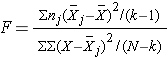

And follows the table of calculations:

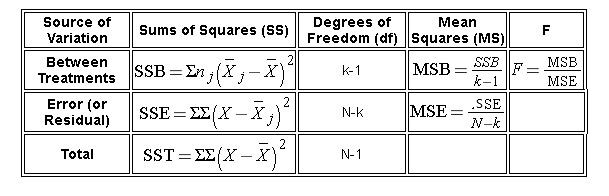




# ANOVA Step By Step

Assumptions while calculating test statisitic F:
- Equal variability in the 4 income groups (e.g population variances are equal s1^2 = s2^2 = s3^2= s4^2


##Sample Data
Groups are the income groups: IG1, IG2, IG3, IG4

Sample Size for each group: n1 =60, n2=29, n3=48,n4=50

Sample mean: mu1, mu2, mu3, mu4

Sample standard deviation: s1,s2,s3,s4






###Preparing all sample data (K= number of samples, N=population, degrees of freedom 1 and 2

In [127]:
k=len(pd.unique(merged_data_clean.IncomeGroup)) 
N=len(merged_data_clean.values) 
#Degrees of Freedom Between Treatments
df1= k-1
#Degrees of Freedom within Treatments
df2 = N-k
#Total Degrees of Freedom
dfT=N-1
print(k,N, df1, df2, dfT)


4 187 3 183 186


###Another way to find the Income Groups

###Calculating the populations of each income group and N 

In [87]:
n0=merged_data_clean.groupby('IncomeGroup').size()[0]  
n1=merged_data_clean.groupby('IncomeGroup').size()[1]  
n2=merged_data_clean.groupby('IncomeGroup').size()[2] 
n3=merged_data_clean.groupby('IncomeGroup').size()[3] 
N=n0+n1+n2+n3
print(n0,n1,n2,n3,n0+n1+n2+n3)


60 29 48 50 187


In [148]:
grandmu=(merged_data_clean['2019'].sum()/N)
print(grandmu)

8.50813905424613


###Sum of Squares Between Samples
We start by calculating the Sum of Squares between. Sum of Squares Between is the variability due to interaction between the groups. Sometimes known as the Sum of Squares of the Model.

In [149]:
print(n0,n1,n2,n3)
merged_data_clean_IG_2019=merged_data_clean[['2019','IncomeGroup']]
IG0=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='High income']
IG1=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='Low income']
IG2=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='Lower middle income']
IG3=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='Upper middle income']

IG0mu_2=((sum(IG0['2019']))/n0)
IG1mu_2=((sum(IG1['2019']))/n1)
IG2mu_2=((sum(IG2['2019']))/n2)
IG3mu_2=((sum(IG3['2019']))/n3)

SSB= n0*(IG0mu_2 -grandmu )**2 + n1*(IG1mu_2-grandmu)**2 + n2*(IG2mu_2-grandmu)**2 + n3*(IG3mu_2-grandmu)**2
SSB


60 29 48 50


740.1497027860728

### Mean Square for SSB

In [150]:
MSSB= SSB/df1
MSSB

246.7165675953576

###How to Calculate the Sum of Squares Within
The variability in the data due to differences within each group.

In [177]:
import statistics
IG0_ss=statistics.pvariance(IG0['2019'])
IG1_ss=statistics.pvariance(IG1['2019'])
IG2_ss=statistics.pvariance(IG2['2019'])
IG3_ss=statistics.pvariance(IG3['2019'])
#this calculation was not included in SSW. it didnt result in an accurate 

In [178]:
def variance(datav, ddof=1):
      n = len(datav)
      mean = sum(datav) / n
      return sum((x - mean) ** 2 for x in datav) / (n - ddof)
IG0_sss=variance(IG0['2019'])
IG1_sss=variance(IG1['2019'])
IG2_sss=variance(IG2['2019'])
IG3_sss=variance(IG3['2019'])

In [180]:
SSW=(n0-1)*IG0_sss +(n1-1)*IG1_sss +(n2-1)*IG2_sss +(n3-1)*IG3_sss 
SSW

8935.315361396688

### Mean Square for SSW

In [181]:
MSSW = SSW/df2
MSSW

48.826859898342555

##Calculating the F-value

In [182]:
F=MSSB/MSSW
F

5.0528862210066565

###Calculating p

In [188]:
from scipy import stats
p= stats.f.sf(F,dfT, df2)
p

8.001863810066076e-26

#Interpretation of F

One rejects the the null hypothesis, H0
, if the computed F-static is greater than the critical F-statistic. The critical F-statistic is determined by the degrees of freedom and alpha value. 
In our case, 1-tailed , alpha= 0,05, dof =  186 so critical F = 2.347

Reject H0 if calulated F-statistics > critical F-statistic: 5.05 > 2.347

We reject the null hypothesis H0 because p<= 0.05

The % of Female Unemployment rate was measured across different income groups. 

The purpose of calculating ANOVA was to see if averages of the values of % of Female Unemployment across the different Income Groups were statistically different.

We can now report that Income Group factor greatly alters the average of the % Female Unployment rate for the year 2019.


In [185]:

!pip install researchpy


In [184]:
import researchpy as rp
rp.summary_cont(merged_data_clean['2019'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,2019,187.0,8.5081,7.2124,0.5274,7.4676,9.5486


In [186]:
rp.summary_cont(merged_data_clean_IG_2019.groupby(merged_data_clean_IG_2019['IncomeGroup']))

2019                                            
                       N     Mean      SD      SE 95% Conf. Interval
IncomeGroup                                                         
High income           60   6.5694  4.3386  0.5601    5.4486   7.6901
Low income            29   7.4589  7.4468  1.3828    4.6263  10.2915
Lower middle income   48   8.3339  8.2012  1.1837    5.9525  10.7153
Upper middle income   50  11.6105  7.9678  1.1268    9.3461  13.8749

###Calculation of Sum of Squares Total
Sum of Squares Total will be needed to calculate eta-squared later. This is the total variability in the data:

In [139]:
SStotal = SSB+SSW
SStotal

9475.338487574169

#ANOVA with Pingouin 
Install the library

In [128]:
#One-Way ANOVA 
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 225kB 6.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221687 sha256=a2dd24e2b28c1437c23ab0c0ac5e4c4eb1c1f12572b3cd680cb99c9f29310981
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=3ca93b7c5eefbfc150f00006672a0f0ec253ecf3be7c4df0d0580d76cdaebff3
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=a7df2035d271e6a23b0b62b419974a2d7c287e545eabfb517d55fab82530fa33
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


###ANOVA Table to study variability of the data (between and within samples)

In [129]:
aov= pg.anova(dv='2019', between='IncomeGroup',data= merged_data_clean,detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,IncomeGroup,740.149703,3,246.716568,5.052886,0.002189,0.076498
1,Within,8935.315361,183,48.826860,NaN,NaN,NaN


the impact of the factor Region to the different means of the % Female Unemployment

In [142]:
aov= pg.anova(dv='2019', between='Region',data= merged_data_clean,detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Region,1837.100070,6,306.183345,7.031186,9.754366e-07,0.189872
1,Within,7838.364994,180,43.546472,NaN,NaN,NaN


#Creating a Worldmap with Folium

What follows next is unpivoting the main.data from wide to long format, optionally leaving identifiers set using melt function. One column has all the identifiers that later on, we will be selecting only one identifier % Female Unemployement and only one year 2019 of data from the column 'Year'.

In [189]:
main_data_m=main_data.melt(id_vars=['Country Code', 'Indicator Name'],value_vars=['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
main_data_m.head()

main_data_m= main_data_m.rename(columns={'variable': 'Year'})

main_data_m.head()
main_data_m_clean=main_data_m.dropna()
main_data_m_clean.head()

,Country Code,Indicator Name,Year,value
0,ABW,Population ages 15-64 (% of total population),1991,68.523104
1,ABW,Population ages 0-14 (% of total population),1991,24.084677
78,ABW,"Secondary education, duration (years)",1991,5.000000
82,ABW,"Educational attainment, at least completed pos...",1991,7.186510
83,ABW,"Educational attainment, at least completed pos...",1991,9.047520


In [190]:
import pandas as pd
import folium
import csv
import json


In [191]:
stage = main_data_m_clean
stage



,Country Code,Indicator Name,Year,value
0,ABW,Population ages 15-64 (% of total population),1991,68.523104
1,ABW,Population ages 0-14 (% of total population),1991,24.084677
78,ABW,"Secondary education, duration (years)",1991,5.000000
82,ABW,"Educational attainment, at least completed pos...",1991,7.186510
83,ABW,"Educational attainment, at least completed pos...",1991,9.047520
...,...,...,...,...
1282884,ZWE,"Labor force, female (% of total labor force)",2020,50.859818
1282956,ZWE,"Secondary education, duration (years)",2020,6.000000
1282969,ZWE,Lower secondary school starting age (years),2020,13.000000
1283012,ZWE,"Primary education, duration (years)",2020,7.000000


In [192]:
main_data_m_clean_year=main_data_m_clean[main_data_m_clean['Year']=='2019']
main_data_m_clean_year_ind=main_data_m_clean_year[main_data_m_clean_year['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_m_clean_year_ind

,Country Code,Indicator Name,Year,value
1197670,AFG,"Unemployment, female (% of female labor force)...",2019,14.004000
1197832,AGO,"Unemployment, female (% of female labor force)...",2019,6.942000
1197994,ALB,"Unemployment, female (% of female labor force)...",2019,11.604000
1198318,ARB,"Unemployment, female (% of female labor force)...",2019,19.954200
1198480,ARE,"Unemployment, female (% of female labor force)...",2019,6.046000
...,...,...,...,...
1239304,WSM,"Unemployment, female (% of female labor force)...",2019,9.837000
1239628,YEM,"Unemployment, female (% of female labor force)...",2019,24.879999
1239790,ZAF,"Unemployment, female (% of female labor force)...",2019,30.334999
1239952,ZMB,"Unemployment, female (% of female labor force)...",2019,12.237000


In [ ]:
data_to_plot = main_data_m_clean_year_ind[['Country Code','value']]
data_to_plot['Country Code'].unique()

In [194]:
data_to_plot

,Country Code,value
1197670,AFG,14.004000
1197832,AGO,6.942000
1197994,ALB,11.604000
1198318,ARB,19.954200
1198480,ARE,6.046000
...,...,...
1239304,WSM,9.837000
1239628,YEM,24.879999
1239790,ZAF,30.334999
1239952,ZMB,12.237000


In [195]:
hist_indicator = main_data_m_clean_year_ind.iloc[0]['Indicator Name']
hist_indicator

'Unemployment, female (% of female labor force) (modeled ILO estimate)'

In [196]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [197]:
wc=r'world_countries.json'

In [198]:
world = folium.Map(location=[0, 0], zoom_start=2)


In [199]:
 # choropleth maps bind Pandas Data Frames and json geometries.
world.choropleth(geo_data =wc ,
                data = data_to_plot,
                columns = 
['Country Code', 'value'],

key_on='feature.id',
fill_color = 'YlOrRd',
                  fill_opacity =0.8 ,
                  line_opacity = 0.1,
legend_name ='%Female Unemployment')
world

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
